In [1]:
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib


import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes


## Bacteria Dataset

This is a dataset of Bacteria, and the medicine that is most effective in neutralizing the bacteria. Lets load it into a dataframe.

In [2]:
antibiotics = [
  { "bacteria": "Mycobacterium tuberculosis", "genus": "Other", "penicillin": 800, "streptomycin": 5, "neomycin": 2, "gram": "negative" },
  { "bacteria": "Salmonella schottmuelleri", "genus": "Salmonella", "penicillin": 10, "streptomycin": 0.8, "neomycin": 0.09, "gram": "negative" },
  { "bacteria": "Proteus vulgaris", "genus": "Other", "penicillin": 3, "streptomycin": 0.1, "neomycin": 0.1, "gram": "negative" },
  { "bacteria": "Klebsiella pneumoniae", "genus": "Other", "penicillin": 850, "streptomycin": 1.2, "neomycin": 1, "gram": "negative" },
  { "bacteria": "Brucella abortus", "genus": "Other", "penicillin": 1, "streptomycin": 2, "neomycin": 0.02, "gram": "negative" },
  { "bacteria": "Pseudomonas aeruginosa", "genus": "Other", "penicillin": 850, "streptomycin": 2, "neomycin": 0.4, "gram": "negative" },
  { "bacteria": "Escherichia coli", "genus": "Other", "penicillin": 100, "streptomycin": 0.4, "neomycin": 0.1, "gram": "negative" },
  { "bacteria": "Salmonella (Eberthella) typhosa", "genus": "Salmonella", "penicillin": 1, "streptomycin": 0.4, "neomycin": 0.008, "gram": "negative" },
  { "bacteria": "Aerobacter aerogenes", "genus": "Other", "penicillin": 870, "streptomycin": 1, "neomycin": 1.6, "gram": "negative" },
  { "bacteria": "Brucella antracis", "genus": "Other", "penicillin": 0.001, "streptomycin": 0.01, "neomycin": 0.007, "gram": "positive" },
  { "bacteria": "Streptococcus fecalis", "genus": "Streptococcus", "penicillin": 1, "streptomycin": 1, "neomycin": 0.1, "gram": "positive" },
  { "bacteria": "Staphylococcus aureus", "genus": "Staphylococcus", "penicillin": 0.03, "streptomycin": 0.03, "neomycin": 0.001, "gram": "positive" },
  { "bacteria": "Staphylococcus albus", "genus": "Staphylococcus", "penicillin": 0.007, "streptomycin": 0.1, "neomycin": 0.001, "gram": "positive" },
  { "bacteria": "Streptococcus hemolyticus", "genus": "Streptococcus", "penicillin": 0.001, "streptomycin": 14, "neomycin": 10, "gram": "positive" },
  { "bacteria": "Streptococcus viridans", "genus": "Streptococcus", "penicillin": 0.005, "streptomycin": 10, "neomycin": 40, "gram": "positive" },
  { "bacteria": "Diplococcus pneumoniae", "genus": "Other", "penicillin": 0.005, "streptomycin": 11, "neomycin": 10, "gram": "positive" }
]
dfabio = pd.DataFrame.from_records(antibiotics)
dfabio

,bacteria,genus,penicillin,streptomycin,neomycin,gram
0,Mycobacterium tuberculosis,Other,800.000,5.00,2.000,negative
1,Salmonella schottmuelleri,Salmonella,10.000,0.80,0.090,negative
2,Proteus vulgaris,Other,3.000,0.10,0.100,negative
3,Klebsiella pneumoniae,Other,850.000,1.20,1.000,negative
4,Brucella abortus,Other,1.000,2.00,0.020,negative
5,Pseudomonas aeruginosa,Other,850.000,2.00,0.400,negative
6,Escherichia coli,Other,100.000,0.40,0.100,negative
7,Salmonella (Eberthella) typhosa,Salmonella,1.000,0.40,0.008,negative
8,Aerobacter aerogenes,Other,870.000,1.00,1.600,negative
9,Brucella antracis,Other,0.001,0.01,0.007,positive


In [27]:
colordict = {}
counter = 0
for name, group in dfabio.groupby("genus"):
    colordict[name] = counter
    counter += 1

colordict

{'Other': 0, 'Salmonella': 1, 'Staphylococcus': 2, 'Streptococcus': 3}

Make a scatter plot of Pennicilin (y-axis) vs Neomycin (x-axis) concentrations. Color code these via genus. Do you see something interesting concerning Diplococcus vs Streptococcus bacteria?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


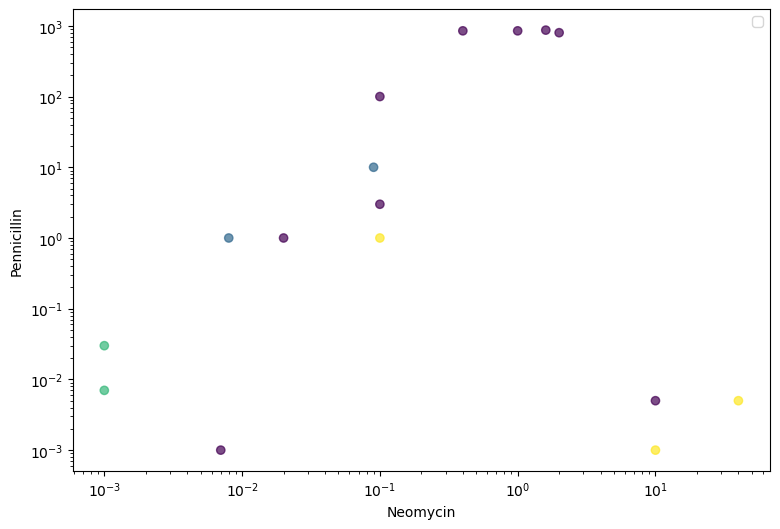

In [43]:
# your code here
fig, ax = plt.subplots(figsize = (9,6))
ax.scatter(dfabio.neomycin, dfabio.penicillin, alpha = 0.7,
           c= dfabio.genus.apply(lambda x: colordict[x]))
ax.set_xlabel("Neomycin")
ax.set_ylabel("Pennicillin")
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

matplotlib.collections.PathCollection

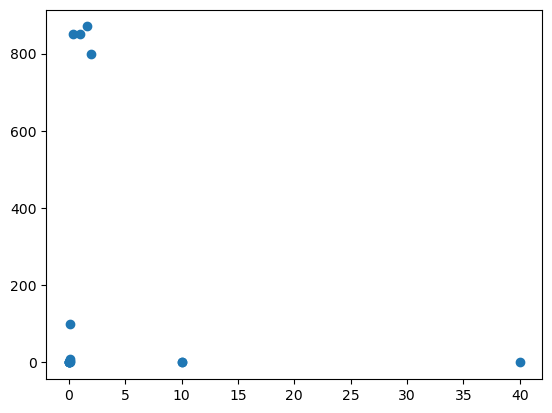

In [44]:
type(plt.scatter(dfabio.neomycin, dfabio.penicillin))

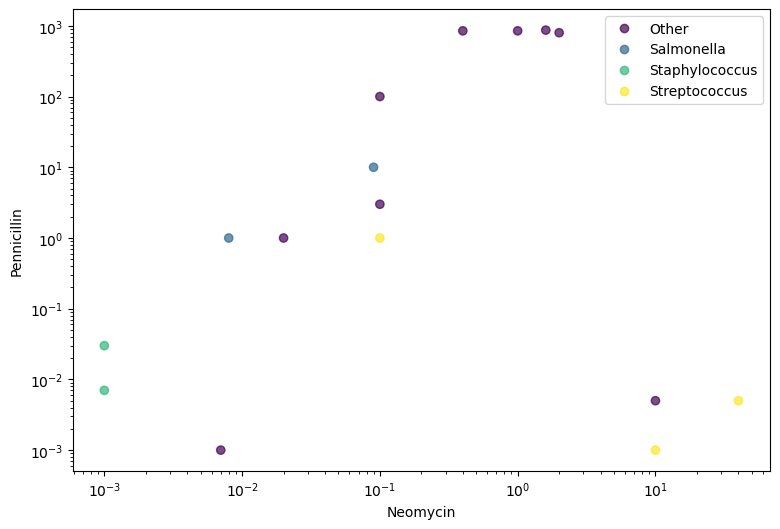

In [55]:
fig, ax = plt.subplots(figsize = (9,6))
scatter = ax.scatter(dfabio.neomycin, dfabio.penicillin, alpha = 0.7,
           c= dfabio.genus.apply(lambda x: colordict[x]), axes=ax)
ax.set_xlabel("Neomycin")
ax.set_ylabel("Pennicillin")
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(handles=scatter.legend_elements()[0], labels=colordict.keys())

In [58]:
dfabio.apply(lambda row: print(row))

0          Mycobacterium tuberculosis
1           Salmonella schottmuelleri
2                    Proteus vulgaris
3               Klebsiella pneumoniae
4                    Brucella abortus
5              Pseudomonas aeruginosa
6                    Escherichia coli
7     Salmonella (Eberthella) typhosa
8                Aerobacter aerogenes
9                   Brucella antracis
10              Streptococcus fecalis
11              Staphylococcus aureus
12               Staphylococcus albus
13          Streptococcus hemolyticus
14             Streptococcus viridans
15             Diplococcus pneumoniae
Name: bacteria, dtype: object
0              Other
1         Salmonella
2              Other
3              Other
4              Other
5              Other
6              Other
7         Salmonella
8              Other
9              Other
10     Streptococcus
11    Staphylococcus
12    Staphylococcus
13     Streptococcus
14     Streptococcus
15             Other
Name: genus, dtype: object

bacteria        None
genus           None
penicillin      None
streptomycin    None
neomycin        None
gram            None
dtype: object

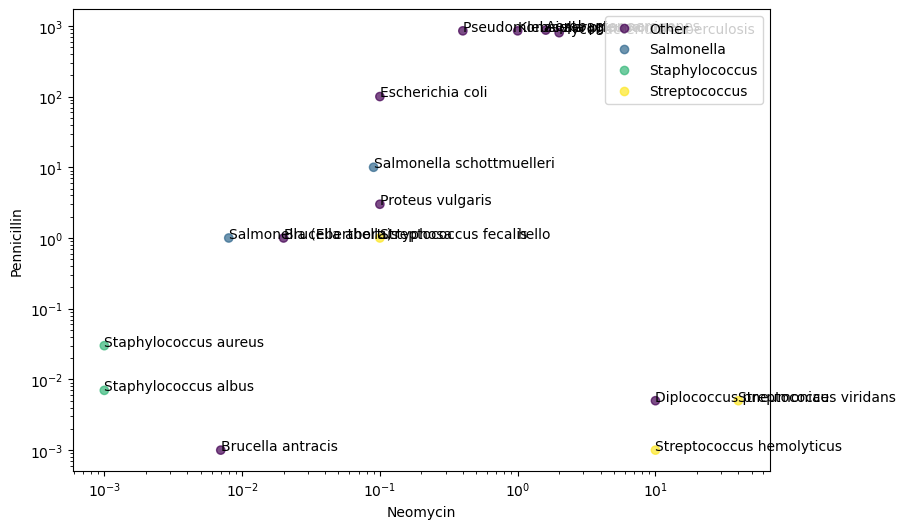

In [68]:
fig, ax = plt.subplots(figsize = (9,6))

def myf(row):
    ax.annotate(row.bacteria, xy = (row.neomycin, row.penicillin))

scatter = ax.scatter(dfabio.neomycin, dfabio.penicillin, alpha = 0.7,
           c= dfabio.genus.apply(lambda x: colordict[x]), axes=ax)
dfabio.apply(axis = 1, func = myf)
ax.annotate("hello", xy = (1,1))
ax.set_xlabel("Neomycin")
ax.set_ylabel("Pennicillin")
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(handles=scatter.legend_elements()[0], labels=colordict.keys())

In [80]:
import numpy as np
np.random.uniform(-0.1, 0.1)

0.014508431443294768

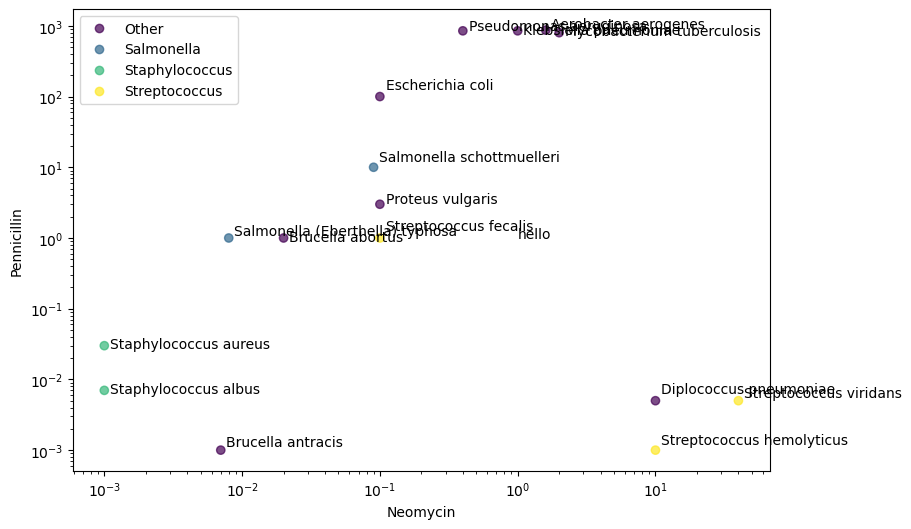

In [86]:
fig, ax = plt.subplots(figsize = (9,6))

def myf(row):
    ax.annotate(row.bacteria, xy = (1.1*row.neomycin, (np.random.uniform(1, 1.5))*row.penicillin), va="center")

scatter = ax.scatter(dfabio.neomycin, dfabio.penicillin, alpha = 0.7,
           c= dfabio.genus.apply(lambda x: colordict[x]), axes=ax)
dfabio.apply(axis = 1, func = myf)
#ax.annotate("hello", xy = (1,1))
ax.set_xlabel("Neomycin")
ax.set_ylabel("Pennicillin")
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(handles=scatter.legend_elements()[0], labels=colordict.keys(), loc="upper left")

In [33]:
# your code here


#### 